# Market Sentiments

In [1]:
%pip install pandas matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 21.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.9/245.9 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 19.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 2.9 MB/s eta 0:00:00
  Using cached pillow-10.4.0-cp311-cp311-macosx_11_0_arm64.whl (3.4 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 16.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sentiments = pd.read_excel("sentiments.xlsx", sheet_name='2020 - 2024')
sentiments['Date'] = sentiments['Date'].str.slice(0, 10)

## Time Analysis

In [37]:
sentiments['Date'] = pd.to_datetime(sentiments['Date'])

### Average Rating Per Day

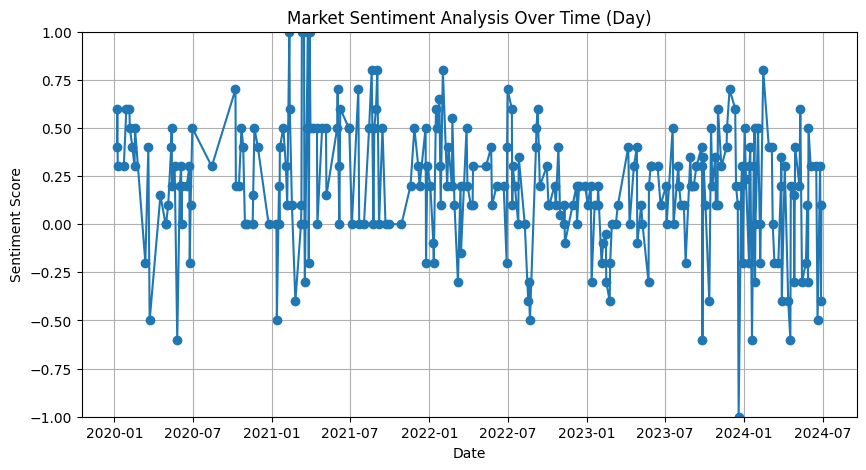

In [38]:
sentiments_day = sentiments.groupby('Date').agg({'Rating': 'mean'}).reset_index()

plt.figure(figsize=(10, 5))
plt.plot(sentiments_day['Date'], sentiments_day['Rating'], marker='o')

plt.title('Market Sentiment Analysis Over Time (Day)')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.ylim(-1, 1)
plt.grid(True)

plt.show()


### Average Rating Per Month

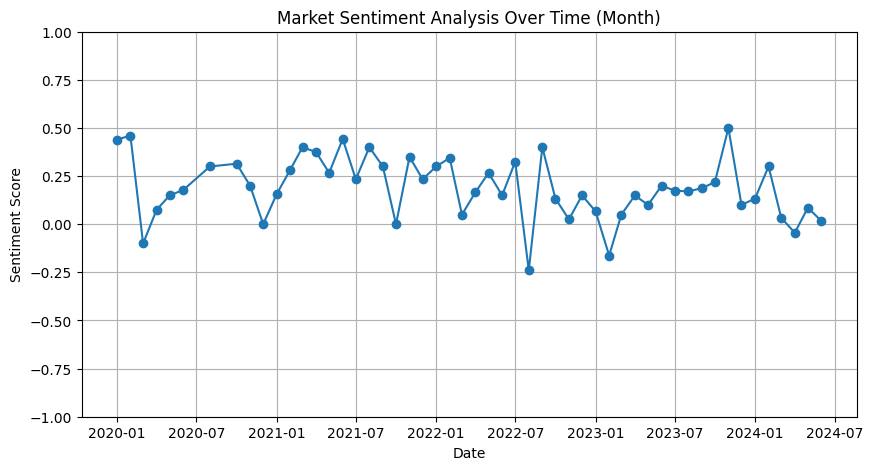

In [46]:
sentiments['Year Month'] = sentiments['Date'].dt.to_period('M')
sentiments_month = sentiments.groupby('Year Month').agg({'Rating': 'mean'}).reset_index()
sentiments_month['Year Month'] = sentiments_month['Year Month'].dt.to_timestamp()

plt.figure(figsize=(10, 5))
plt.plot(sentiments_month['Year Month'], sentiments_month['Rating'], marker='o')

plt.title('Market Sentiment Analysis Over Time (Month)')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.ylim(-1, 1)
plt.grid(True)

plt.show()

### Average Rating Per Quarter

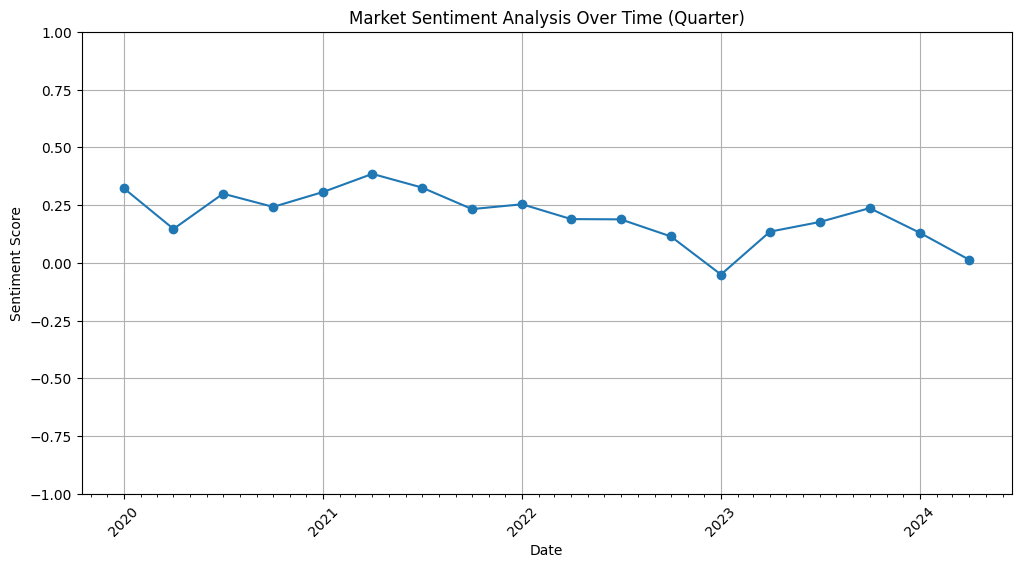

In [53]:
import matplotlib.dates as mdates

sentiments['Year Quarter'] = sentiments['Date'].dt.to_period('Q')
sentiments_quarter = sentiments.groupby('Year Quarter').agg({'Rating': 'mean'}).reset_index()
sentiments_quarter['Year Quarter'] = sentiments_quarter['Year Quarter'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(sentiments_quarter['Year Quarter'], sentiments_quarter['Rating'], marker='o')

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())

plt.title('Market Sentiment Analysis Over Time (Quarter)')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.ylim(-1, 1)
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

### Forecasting

In [72]:
%pip install statsmodels scikit-learn pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.0/628.0 kB 13.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.5 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


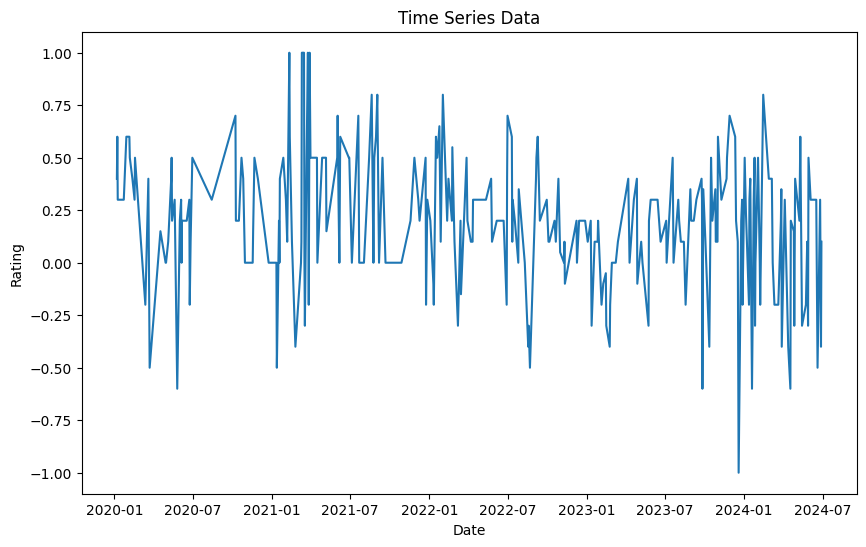

ADF Statistic: -12.32920953196647
p-value: 6.484173981173838e-23


/Users/loowenwen/Desktop/Visual Code Studio/jtc-market-sentiments/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/loowenwen/Desktop/Visual Code Studio/jtc-market-sentiments/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/loowenwen/Desktop/Visual Code Studio/jtc-market-sentiments/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Test MSE: 0.14821118641370223


/Users/loowenwen/Desktop/Visual Code Studio/jtc-market-sentiments/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/loowenwen/Desktop/Visual Code Studio/jtc-market-sentiments/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


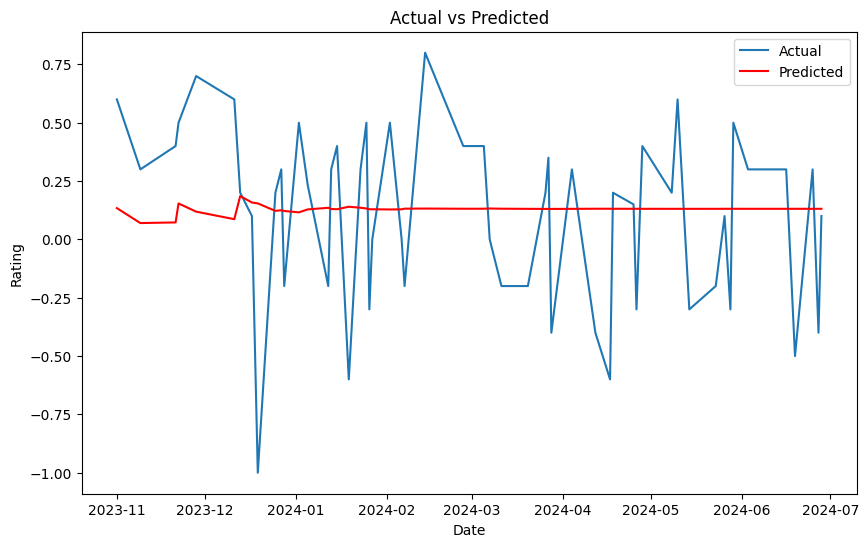

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

data = pd.read_excel('sentiments.xlsx', usecols=['Date', 'Rating 1'])

data_day = data.groupby('Date').mean().reset_index()
data_day['Date'] = pd.to_datetime(data_day['Date'])
data_day.set_index('Date', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(data_day)
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Rating')
plt.show()

train_size = int(len(data_day) * 0.8)
train, test = data_day[:train_size], data_day[train_size:]

result = adfuller(train['Rating 1'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

if result[1] > 0.05:
    train = train.diff().dropna()

p, d, q = 10, 1, 0  # parameters
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()

predictions = model_fit.forecast(steps=len(test))

error = mean_squared_error(test['Rating 1'], predictions)
print('Test MSE:', error)

plt.figure(figsize=(10, 6))
plt.plot(test.index, test['Rating 1'], label='Actual')
plt.plot(test.index, predictions, label='Predicted', color='red')
plt.title('Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Rating')
plt.legend()
plt.show()

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

result = adfuller(data['your_column'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(data['your_column'], ax=plt.gca(), lags=20)
plt.subplot(122)
plot_pacf(data['your_column'], ax=plt.gca(), lags=20)
plt.show()

model = auto_arima(data['your_column'], start_p=1, start_q=1,
                   test='adf',       # use adftest to find optimal 'd'
                   max_p=3, max_q=3, # maximum p and q
                   m=1,              # frequency of series
                   d=None,           # let model determine 'd'
                   seasonal=False,   # no Seasonality
                   start_P=0, 
                   D=0, 
                   trace=True,
                   error_action='ignore',  
                   suppress_warnings=True, 
                   stepwise=True)

print(model.summary())

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

result = adfuller(data['your_column'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(data['your_column'], ax=plt.gca(), lags=20)
plt.subplot(122)
plot_pacf(data['your_column'], ax=plt.gca(), lags=20)
plt.show()

model = auto_arima(data['your_column'], start_p=1, start_q=1,
                   test='adf',       # use adftest to find optimal 'd'
                   max_p=3, max_q=3, # maximum p and q
                   m=1,              # frequency of series
                   d=None,           # let model determine 'd'
                   seasonal=False,   # no Seasonality
                   start_P=0, 
                   D=0, 
                   trace=True,
                   error_action='ignore',  
                   suppress_warnings=True, 
                   stepwise=True)

print(model.summary())

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [2]:
import numpy as np
print("Numpy version:", np.__version__)

Numpy version: 2.0.1
